In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

df_cleaned = pd.read_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned.csv')

# Preparing the data
X = df_cleaned.drop(['NO2_tomorrow', 'Datum', 'Street', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)  # Excluding target and categorical columns
y = df_cleaned['NO2_tomorrow']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = X.columns.tolist() 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
y_pred_lin_reg = lin_reg.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)



mse_lin_reg, r2_lin_reg


(75.54648185405561, 0.6891678623331245)

In [2]:


# ... (previous code for training the model)

# Get the coefficients from the model
weights = lin_reg.coef_

# Create a DataFrame with feature names and their corresponding weights
features_weights = pd.DataFrame({'Feature': feature_names, 'Weight': weights})

# Sort the features by the absolute values of their weights in descending order
features_weights['Absolute Weight'] = features_weights['Weight'].abs()
features_weights_sorted = features_weights.sort_values(by='Absolute Weight', ascending=False)

# Display the sorted feature weights
features_weights_sorted.head(50)


,Feature,Weight,Absolute Weight
32,1.5km_green,2.317665e+11,2.317665e+11
36,1.5km_trees,-2.094787e+11,2.094787e+11
38,500m_trees,1.848452e+11,1.848452e+11
35,200m_green,1.760698e+11,1.760698e+11
39,200m_trees,-1.630855e+11,1.630855e+11
34,500m_green,-1.484424e+11,1.484424e+11
33,1km_green,1.356351e+11,1.356351e+11
37,1km_trees,-1.328725e+11,1.328725e+11
29,Weekday_4,1.903666e+10,1.903666e+10
31,Weekday_6,1.901260e+10,1.901260e+10


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def random_forest_hyperparameter_tuning(X, Y, hyperparameter_sets):
    
    #Trains and evaluates Random Forest models with different hyperparameters.

   # Parameters:
    #- X: Features dataset
    #- Y: Target variable
   # - hyperparameter_sets: A list of dictionaries where each dictionary contains a set of hyperparameters

   # Returns:
   # A list of tuples containing the hyperparameters and their corresponding MSE and R-squared values.
   # """
    # Splitting the dataset into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    results = []

    for params in hyperparameter_sets:
        # Building and training the Random Forest model
        rf_model = RandomForestRegressor(**params)
        rf_model.fit(X_train, Y_train)

        # Predicting on the test set
        Y_pred = rf_model.predict(X_test)

        # Evaluating the model
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)

        results.append((params, mse, r2))

        

    return results
    

# Example usage
hyperparameter_sets = [
    {'n_estimators': 400, 'max_depth': 30},
    {'n_estimators': 450, 'max_depth': 40},
    # Add more hyperparameter sets as needed
]

X = df_cleaned.drop(['NO2_tomorrow', 'Datum', 'Street',  'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)  # Excluding target and categorical columns
Y = df_cleaned['NO2_tomorrow']

results = random_forest_hyperparameter_tuning(X, Y, hyperparameter_sets)
for params, mse, r2 in results:
    print(f"Hyperparameters: {params}, MSE: {mse}, R2: {r2}")


KeyboardInterrupt: 

In [33]:


from sklearn.ensemble import RandomForestRegressor
X = df_cleaned.drop(['NO2_tomorrow', 'Datum', 'Street', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2', "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], axis=1
)  # Excluding target and categorical columns
y = df_cleaned['NO2_tomorrow']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = X.columns.tolist() 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the performance metrics
print(f'MSE (Random Forest): {mse_rf}')
print(f'R^2 Score (Random Forest): {r2_rf}')

# Feature importance
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_reg.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances.head(50)



MSE (Random Forest): 73.52877021388693
R^2 Score (Random Forest): 0.6974696337315673


,Feature,Importance
2,NO2,0.514108
3,NOx,0.059271
12,p,0.035720
19,Weekday_6,0.032635
7,PM10,0.029207
17,Weekday_4,0.029114
10,T,0.028899
0,TotalDailyTraffic,0.028601
18,Weekday_5,0.027647
29,WVv,0.024656


MSE (Random Forest): 0.15661170666512542
R^2 Score (Random Forest): 0.9980137937207595


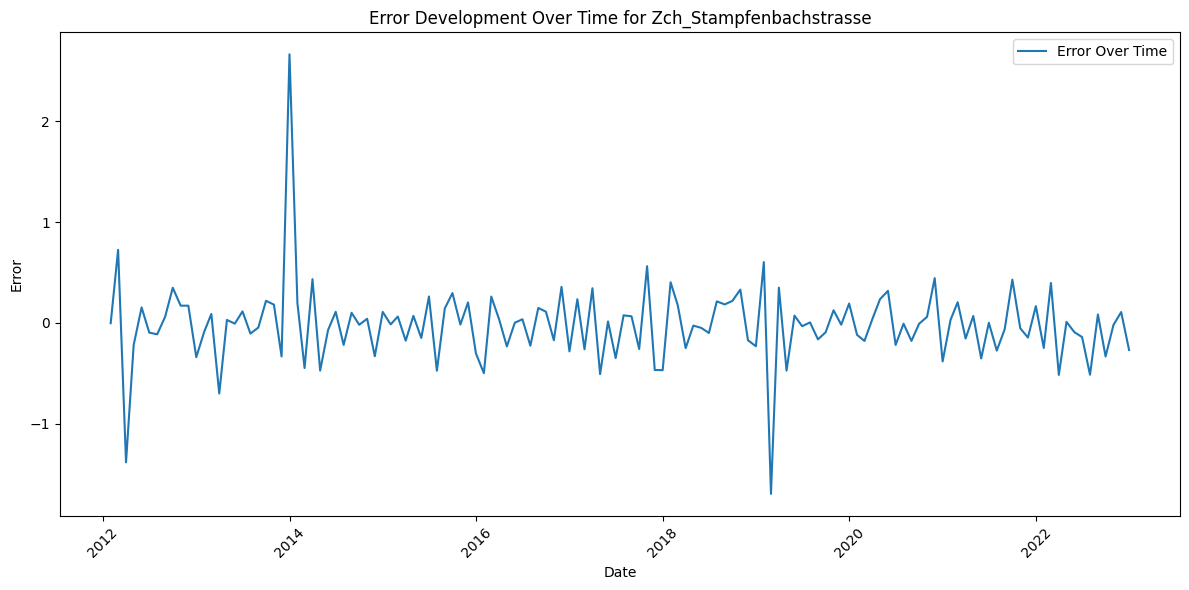

MSE (Random Forest): 0.1881965808700711
R^2 Score (Random Forest): 0.9975080833853609


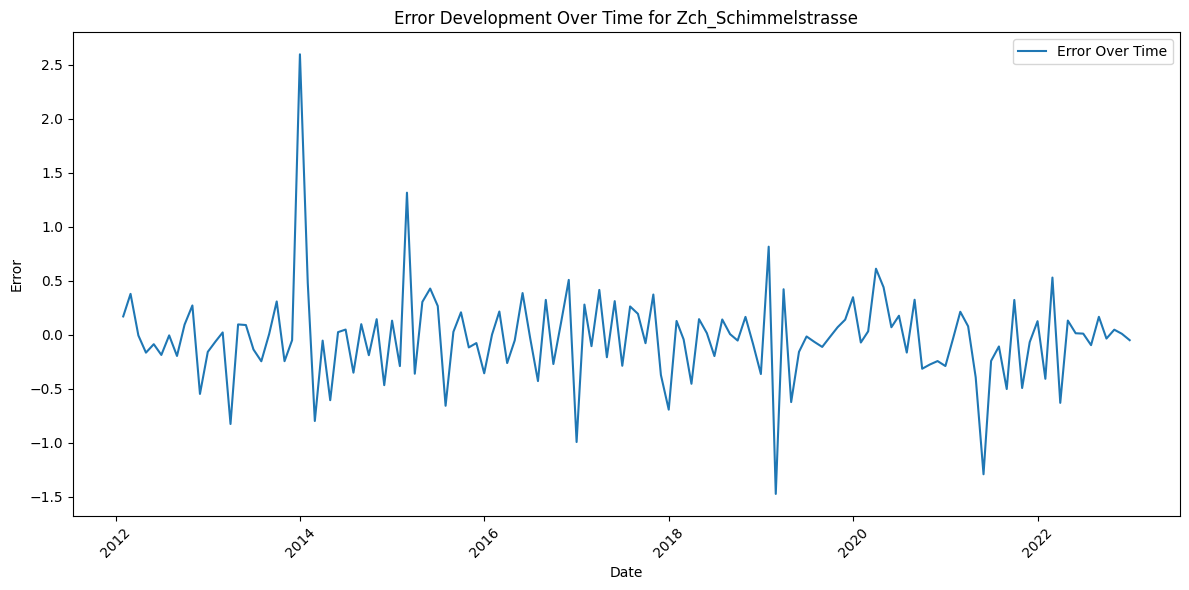

MSE (Random Forest): 0.11515726984351958
R^2 Score (Random Forest): 0.9979330395640204


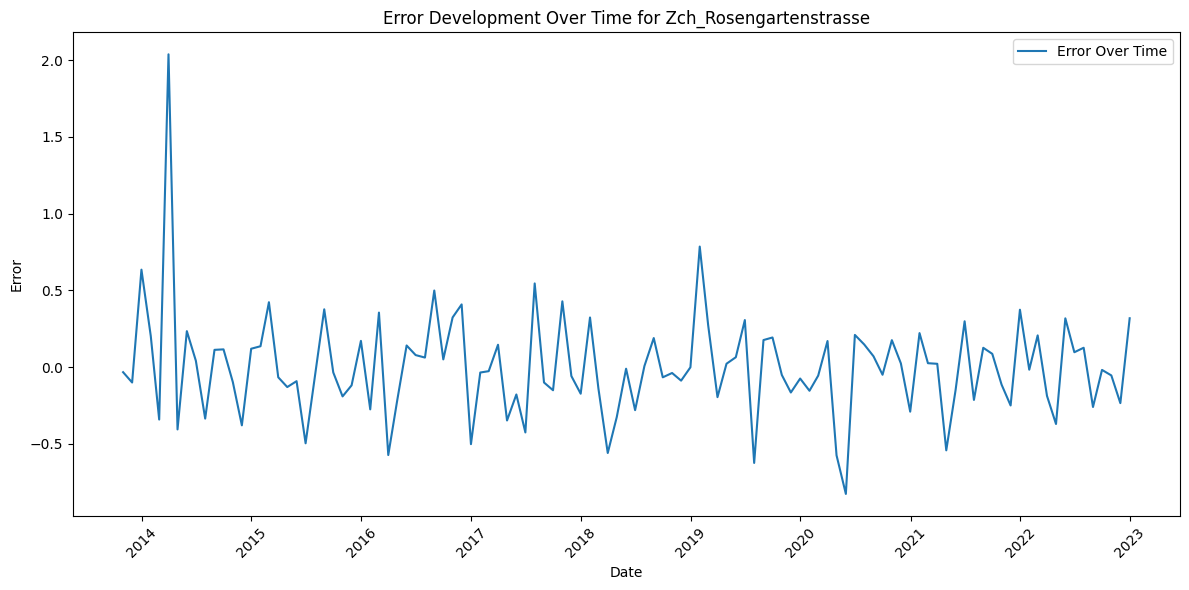

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to perform linear regression and plot error over time, with NaN handling
def analyze_street(data, street_name):
    # Filter data for the specific street
    street_data = data[data['Street'] == street_name]

    X = street_data.drop(['NO2_tomorrow', 'Datum', 'Street', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
    y = street_data['NO2_tomorrow']
    

    rf_reg = RandomForestRegressor(random_state=42)

    # Fit the model to the training data
    rf_reg.fit(X, y)

    # Predict on the test data
    y_pred_rf = rf_reg.predict(X)

    # Calculating errors
    errors = y - y_pred_rf

    mse_rf = mean_squared_error(y, y_pred_rf)
    r2_rf = r2_score(y, y_pred_rf)

    # Print the performance metrics
    print(f'MSE (Random Forest): {mse_rf}')
    print(f'R^2 Score (Random Forest): {r2_rf}')

    # Plotting the error over time
    plt.figure(figsize=(12, 6))
    plt.plot(street_data['Datum'], errors, label='Error Over Time')
    plt.title(f'Error Development Over Time for {street_name}')
    plt.xlabel('Date')
    plt.ylabel('Error')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Load the dataset

df_cleaned = pd.read_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned.csv')

# Convert 'Datum' to datetime and resample data to a monthly frequency for each street
df_cleaned['Datum'] = pd.to_datetime(df_cleaned['Datum'])
monthly_data = df_cleaned.set_index('Datum').groupby('Street').resample('M').mean().reset_index()

# Unique streets in the dataset
unique_streets = df_cleaned['Street'].unique()

# Analyzing and plotting for each street with monthly data
for street in unique_streets:
    analyze_street(monthly_data, street)


In [7]:
mse_rf = mean_squared_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

# Print the performance metrics
print(f'MSE (Random Forest): {mse_rf}')
print(f'R^2 Score (Random Forest): {r2_rf}')

NameError: name 'y_pred_rf' is not defined

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

def random_forest_grid_search(X, Y, param_grid, cv=5, verbose=1, n_jobs=-1):
    """
    Performs Grid Search with Cross-Validation to tune hyperparameters of a Random Forest model.

    Parameters:
    - X: Features dataset.
    - Y: Target variable.
    - param_grid: Dictionary with parameters names as keys and lists of parameter settings to try as values.
    - cv: Number of folds in cross-validation. Default is 5.
    - verbose: Controls verbosity of output. Default is 1.
    - n_jobs: Number of jobs to run in parallel. Default is -1 (using all processors).

    Returns:
    The best hyperparameters from Grid Search and the corresponding R-squared value.
    """
    # Splitting the dataset into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Random Forest model
    rf = RandomForestRegressor()

    # Grid Search with Cross-Validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, verbose=verbose, n_jobs=n_jobs)
    grid_search.fit(X_train, Y_train)

    # Best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score

# Example usage
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

X = df_cleaned.drop(['NO2_tomorrow', 'Datum', 'Street'], axis=1)  # Excluding target and categorical columns
Y = df_cleaned['NO2_tomorrow']

best_params, best_score = random_forest_grid_search(X, Y, param_grid)
print(f"Best Hyperparameters: {best_params}, Best R-squared Score: {best_score}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
267 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, Best R-squared Score: 0.658241659200141


In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Parameters to try in the grid search
parameter_space = {
    'hidden_layer_sizes': [(100,), (100, 100), (100, 100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01],
}

# Create an MLPRegressor with a grid search
mlp_gs = GridSearchCV(MLPRegressor(max_iter=500, random_state=42), parameter_space, n_jobs=-1, cv=3)

# Fit the model on the training data
mlp_gs.fit(X_train, y_train)

# Best parameters found
best_params = mlp_gs.best_params_
best_params


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [52]:
# Initialize the MLPRegressor
# Here we use a simple architecture with two hidden layers, each with 100 neurons
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), 
                   activation='relu',
                   learning_rate_init= 0.01,
                   solver= 'adam', 
                   random_state=42, 
                   max_iter=500)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Calculate performance metrics
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

mse_mlp, r2_mlp

(95.78360083855937, 0.6059032707890178)

ValueError: num must be an integer with 1 <= num <= 12, not 13

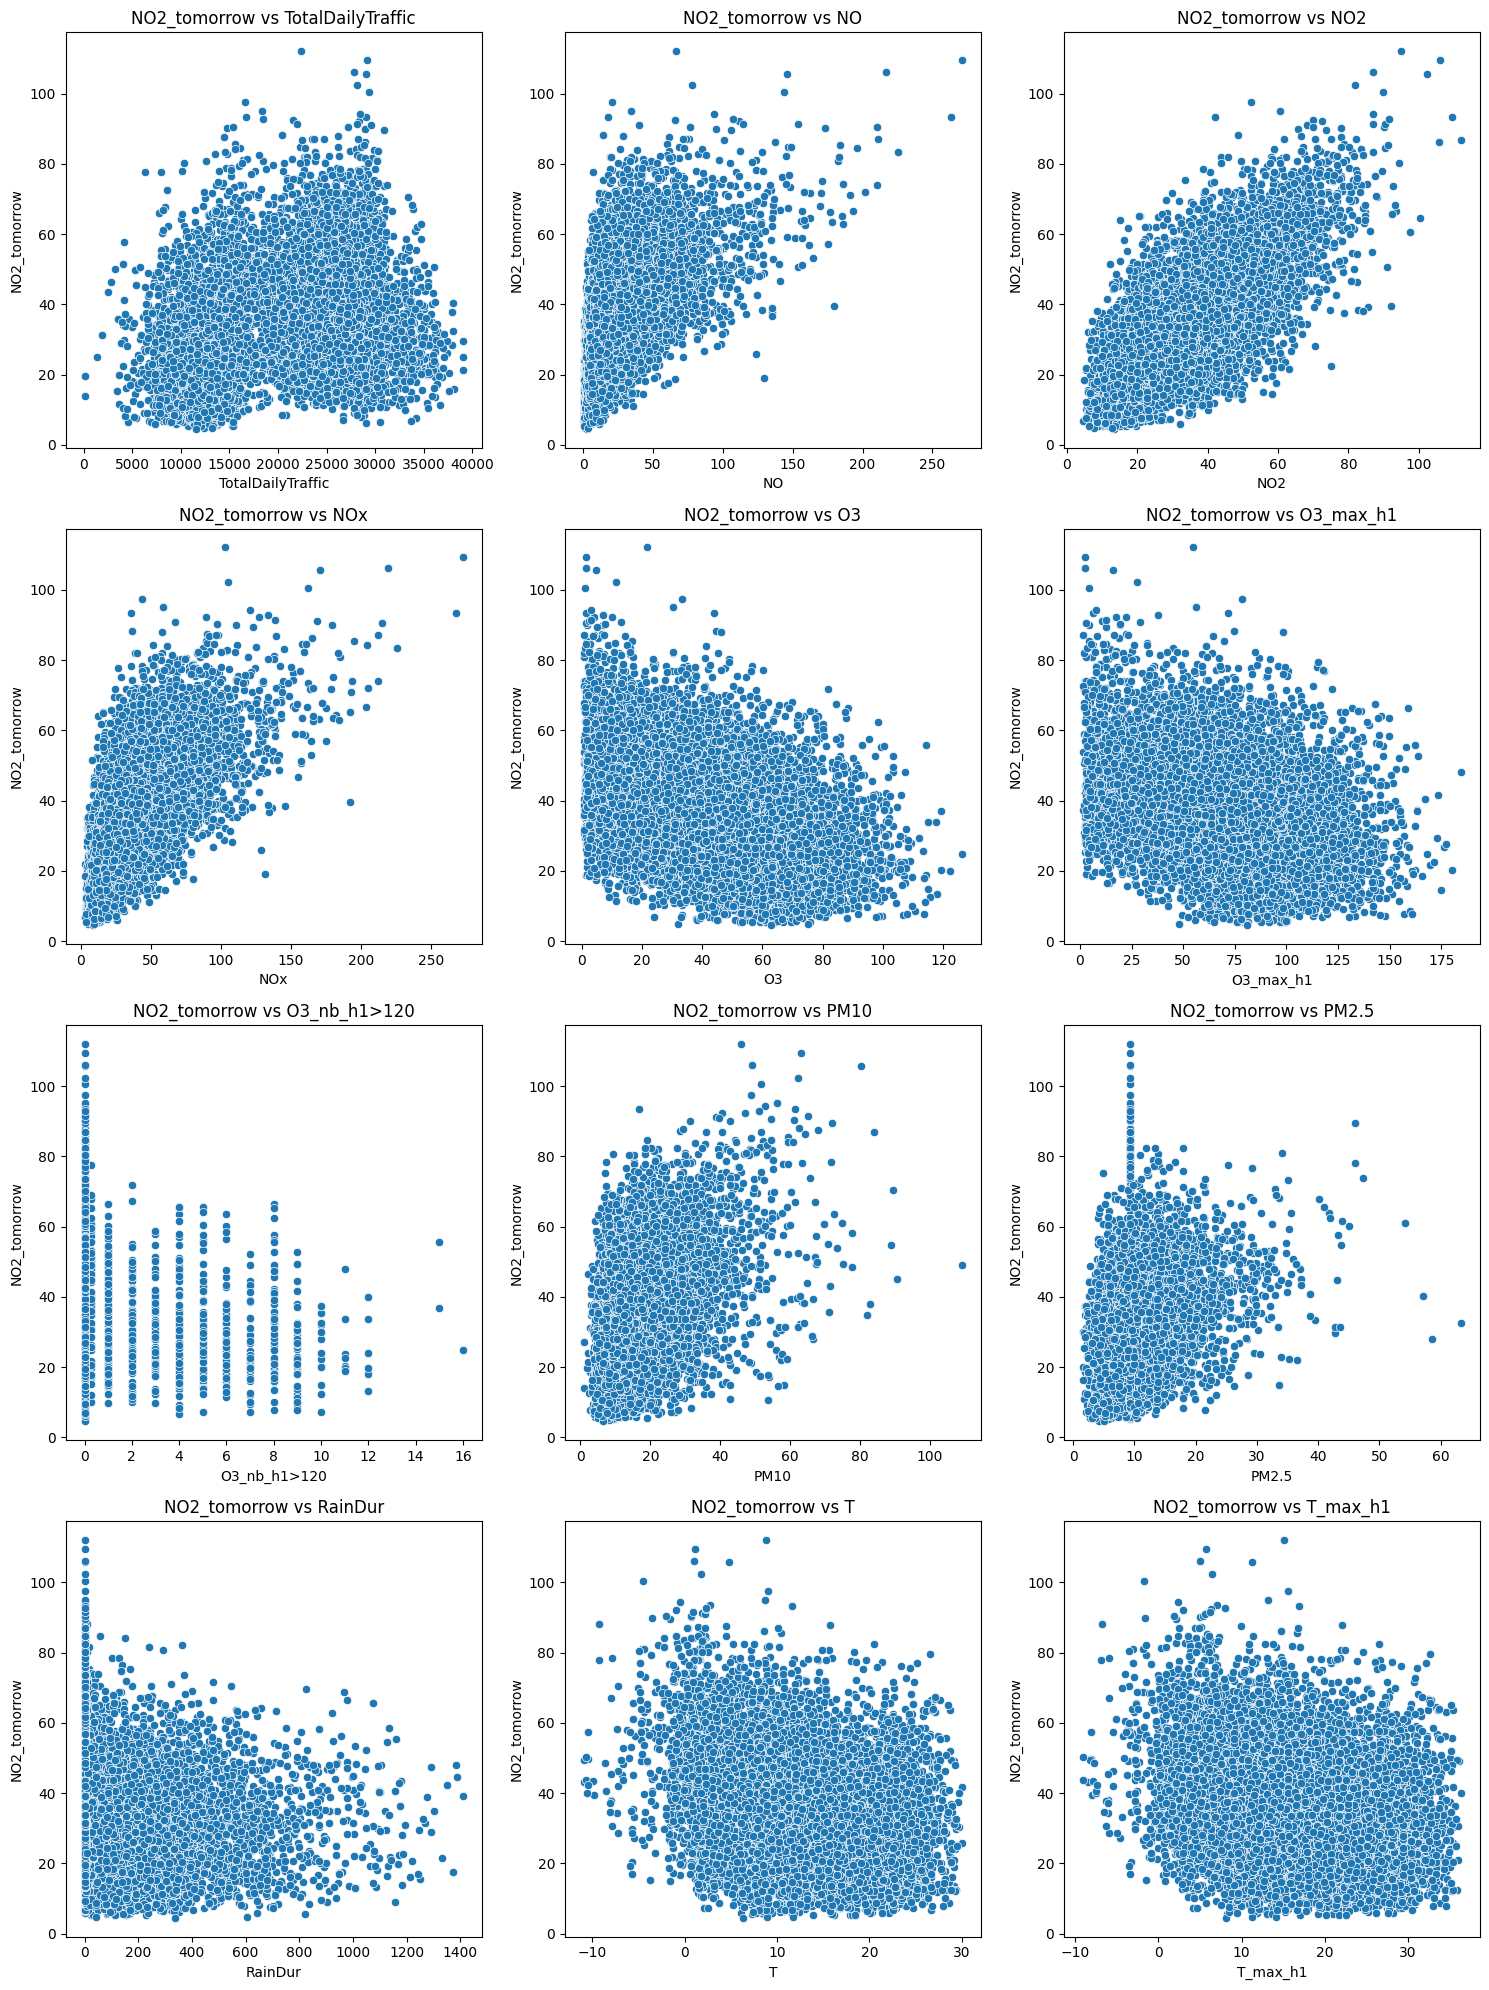

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df_cleaned = pd.read_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned_trafficdropped.csv')  # Make sure to use the correct path

# List of features to plot against 'NO2_tomorrow'
features = df_cleaned.drop(columns=['NO2_tomorrow', 'Datum', 'Street', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2', "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Number of plots per figure
plots_per_figure = 10  # For example, 3x3 grid

# Create multiple figures
for i in range(0, len(features), plots_per_figure):
    # Determine the number of rows for this figure
    num_features = len(features[i:i+plots_per_figure])
    num_rows = (num_features - 1) // 3 + 1

    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size as needed

    for j, feature in enumerate(features[i:i+plots_per_figure]):
        plt.subplot(num_rows, 3, j + 1)  # Adjust the subplot grid dynamically
        sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['NO2_tomorrow'])
        plt.title(f'NO2_tomorrow vs {feature}')
        plt.tight_layout()

    plt.show()

In [12]:
#Random Forest with CV and polynomials

df_cleaned = pd.read_csv('/Users/fredericksafian/VSCODE/finaldata/df_cleaned.csv')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# Define X and y
X = df_cleaned.drop(['NO2_tomorrow', 'Datum', 'Street', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
y = df_cleaned['NO2_tomorrow']

# Assuming X and y are already defined
# Instantiate the PolynomialFeatures object
poly = PolynomialFeatures(degree=2)

# Transform the features
X_poly = poly.fit_transform(X)

# Create the random forest regressor
regressor = RandomForestRegressor()

# Perform cross-validation (using MSE for consistency with previous analysis)
neg_mse_scores = cross_val_score(regressor, X_poly, y, cv=5, scoring='neg_mean_squared_error')

# Convert to positive MSE scores
mse_scores = -neg_mse_scores

# Print the MSE scores
print("MSE scores:", mse_scores)




MSE scores: [85.65355027 80.27262764 93.72229223 85.75845659 87.32476338]
